In [1]:
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk
from lightkurve import search_targetpixelfile

In [5]:
search_result = lk.search_tesscut('Gaia DR25290850609994130560')
print(search_result)

SearchResult containing 15 data products.

 #     mission     year  author exptime         target_name         distance
                                   s                                 arcsec 
--- -------------- ---- ------- ------- --------------------------- --------
  0 TESS Sector 04 2018 TESScut    1426 Gaia DR25290850609994130560      0.0
  1 TESS Sector 07 2019 TESScut    1426 Gaia DR25290850609994130560      0.0
  2 TESS Sector 08 2019 TESScut    1426 Gaia DR25290850609994130560      0.0
  3 TESS Sector 09 2019 TESScut    1426 Gaia DR25290850609994130560      0.0
  4 TESS Sector 10 2019 TESScut    1426 Gaia DR25290850609994130560      0.0
  5 TESS Sector 27 2020 TESScut     475 Gaia DR25290850609994130560      0.0
  6 TESS Sector 31 2020 TESScut     475 Gaia DR25290850609994130560      0.0
  7 TESS Sector 34 2021 TESScut     475 Gaia DR25290850609994130560      0.0
  8 TESS Sector 35 2021 TESScut     475 Gaia DR25290850609994130560      0.0
  9 TESS Sector 36 2021 TESScut  

In [3]:
search_result_s4 = lk.search_tesscut('Gaia DR25290850609994130560', sector=4)
tpfs_s4 = search_result_s4.download(cutout_size=10)
print(tpfs_s4)

TessTargetPixelFile(TICID: Gaia DR25290850609994130560)


In [13]:
!pip show lightkurve

Name: lightkurve
Version: 2.4.0
Summary: A friendly package for Kepler & TESS time series analysis in Python.
Home-page: https://docs.lightkurve.org
Author: Geert Barentsen
Author-email: hello@geert.io
License: MIT
Location: C:\Users\Gumbledalf\Miniconda3\Lib\site-packages
Requires: astropy, astroquery, beautifulsoup4, bokeh, fbpca, matplotlib, memoization, numpy, oktopus, pandas, patsy, requests, scikit-learn, tqdm, uncertainties, urllib3
Required-by: 


In [14]:
tpfs = lk.search_targetpixelfile('Gaia DR25290850609994130560', sector=4).download_all()
print(tpfs)

None


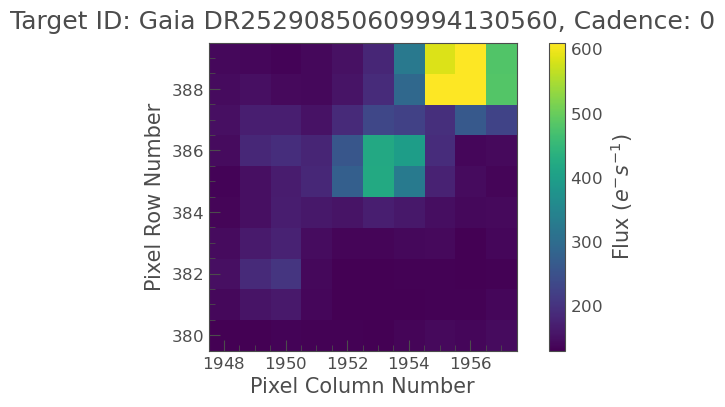

In [4]:
tpfs_s4.plot();

In [9]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [11]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

Filename: C:\Users\Gumbledalf\.astropy\cache\download\url\ff6e0b93871033c68022ca026a956d87\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
(893, 891)


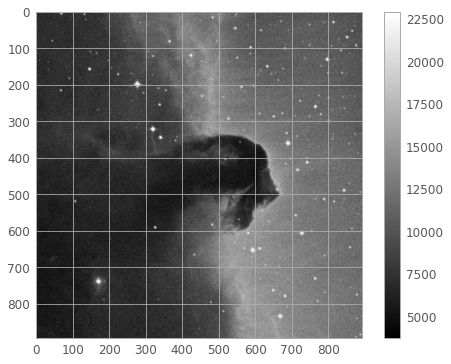

In [13]:
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)

print(image_data.shape)

plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [ ]:
fits_file = "https://archive.stsci.edu/missions/tess/ffi/s0001/2018/206/4-2/tess2018206192942-s0001-4-2-0120-s_ffic.fits"

In [13]:
file_path = '32.087042, 10.994953/NGC 821 TGLC 40pxlc/hlsp_tglc_tess_ffi_gaiaid-2571199008022444416-s0042-cam3-ccd3_tess_v1_llc.fits'
lc = lk.io.tess.read_tess_lightcurve(file_path, flux_column='cal_aper_flux')

KeyError: 'quality'

In [12]:
with fits.open('32.087042, 10.994953/NGC 821 TGLC 40pxlc/hlsp_tglc_tess_ffi_gaiaid-2571199008022444416-s0042-cam3-ccd3_tess_v1_llc.fits') as hdul:
    print(hdul[1].columns.names)

['time', 'psf_flux', 'aperture_flux', 'cal_psf_flux', 'cal_aper_flux', 'background', 'cadence_num', 'TESS_flags', 'TGLC_flags']
